In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
Covid_US_data = "time_series_covid19_confirmed_US.csv.txt"
Covid_US_df = pd.read_csv(Covid_US_data)

Covid_US_df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,77,82,84,93,112,113,121,121,128,130
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,6,6,6,6,6,6,6,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,286,316,316,452,475,513,573,620,683,725
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,30,30,37,40,42,43,43,45,45,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,...,303,344,501,483,533,648,677,915,838,908
3249,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,...,0,0,0,0,0,0,0,21,0,0
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0


In [16]:
Last_Week_by_State = Covid_US_df.groupby(["Province_State"])["4/10/20"].median().reset_index()
ByState_df_median = pd.DataFrame(Last_Week_by_State)
ByState_df_median = ByState_df_median.rename(columns={'Province_State': 'State/Territory','4/10/20': 'Median # of Cases'})
ByState_df_median = ByState_df_median.sort_values("Median # of Cases",ascending=[False]).head(5)
pd.options.display.float_format = '{:0.0f}'.format
ByState_df_median

,State/Territory,Median # of Cases
34,New Jersey,1072
44,Puerto Rico,725
25,Massachusetts,464
7,Connecticut,293
8,Delaware,230


<BarContainer object of 5 artists>

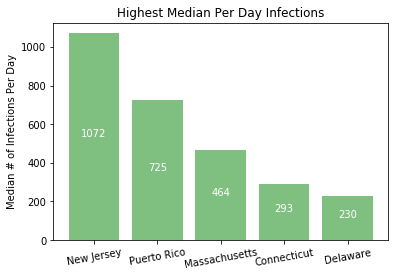

In [33]:
x_axis = ByState_df_median["State/Territory"] 
y_axis = ByState_df_median["Median # of Cases"]
plt.tick_params(axis='x', which='major', labelsize=10, rotation=10)
plt.title("Highest Median Per Day Infections")
plt.ylabel("Median # of Infections Per Day")



def label(rects):
    for rect in rects:
        height = rect.get_height()
        label_position = height/2
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                "%d" % int(height),color="w",
                ha="center")

Bar_Plot = plt.bar(x_axis, y_axis, color="g", alpha= .5)
label(Bar_Plot)
Bar_Plot
